In [262]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time 

In [263]:
expenses= pd.read_json("expenses.json")  

In [264]:
expenses.head()

,id,uid,info,refno,orderid,walletid,amount,date_added,source_name,country,category,status,summary,expense_type,date_updated,category_name
0,82,517578508f924c12b8e5bb0fea9ebe0b,[],None,None,walletc4b3393b6dc741689737465311a96f38,68.05,24-Oct-2022,sterlingbank,nigeria,Other Expenses,pending,SMS NOTIFICATION CHARGE FOR 2022 SE PTEMBER\n1...,debit,24-Oct-2022,Other Expenses
1,81,517578508f924c12b8e5bb0fea9ebe0b,[],None,None,walletc4b3393b6dc741689737465311a96f38,3.75,24-Oct-2022,sterlingbank,nigeria,Other Expenses,pending,MASTERCARD CARD MAINTENANCE VAT FOR Q4 Ref:\nF...,debit,24-Oct-2022,Other Expenses
2,80,517578508f924c12b8e5bb0fea9ebe0b,[],None,None,walletc4b3393b6dc741689737465311a96f38,50.00,24-Oct-2022,sterlingbank,nigeria,Other Expenses,pending,MASTERCARD CARD MAINTENANCE CHARGE FOR Q4\nRef...,debit,24-Oct-2022,Other Expenses
3,79,517578508f924c12b8e5bb0fea9ebe0b,[],None,None,walletc4b3393b6dc741689737465311a96f38,2900.00,13-Oct-2022,sterlingbank,nigeria,uncategorized,pending,POS Purchase from CAFE ONE LA LANG Ref:\nFT222...,debit,13-Oct-2022,uncategorized
4,78,517578508f924c12b8e5bb0fea9ebe0b,[],None,None,walletc4b3393b6dc741689737465311a96f38,800.00,12-Oct-2022,sterlingbank,nigeria,Food and Drinks,pending,POS Purchase from EVRON FOOD STORE LTD LA LANG...,debit,12-Oct-2022,Food and Drinks


In [265]:
expenses.walletid.unique()

array(['walletc4b3393b6dc741689737465311a96f38'], dtype=object)

In [266]:
expenses['category'].replace('transfer','Transfer', inplace=True)

In [267]:
print(expenses.category.unique())

['Other Expenses' 'uncategorized' 'Food and Drinks' 'Personal'
 'withdrawal' 'Transfer']


In [268]:
expenses.replace(to_replace= [None], value = np.nan, inplace = True)

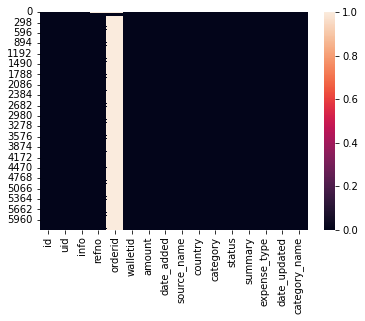

In [269]:
sns.heatmap(expenses.isnull())

In [270]:
expenses = expenses.drop(['refno', 'orderid', 'info'], axis=1)

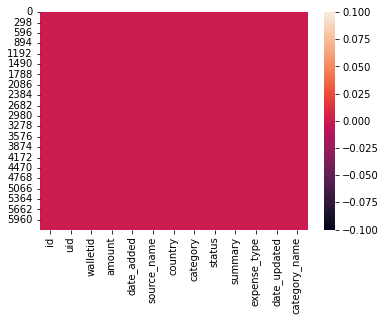

In [271]:
sns.heatmap(expenses.isnull())

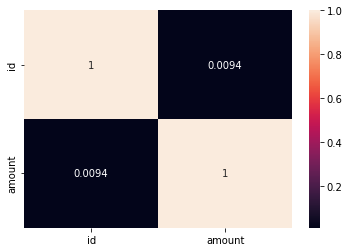

In [272]:
sns.heatmap(expenses.corr(), annot=True)

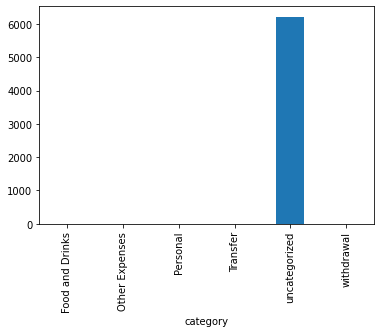

In [273]:
expenses.groupby('category').category.count().plot.bar()

# RANDOM FOREST MODEL


In [274]:
start_time = time.time()

In [275]:
from sklearn.preprocessing import LabelEncoder 

In [276]:
le = LabelEncoder()

In [277]:
expenses = expenses.apply(le.fit_transform)


In [278]:
x = expenses.drop(['category'], axis=1)
y = expenses.category 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


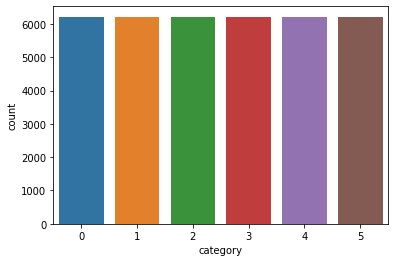

In [279]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
ros.fit(x,y)
x_resampled, y_resampled = ros.fit_resample(x, y)
sns.countplot(y_resampled)

In [280]:
y_resampled. shape


(37302,)

In [281]:
x_resampled.shape

(37302, 12)

In [282]:
new_exp= [x_resampled, y_resampled]

In [283]:
new_expenses = pd.concat(new_exp, axis=1)

In [284]:
#filtering all uncategorized data
uncat_data = new_expenses.loc[new_expenses['category']== 4]

In [285]:
uncat_data

,id,uid,walletid,amount,date_added,source_name,country,status,summary,expense_type,date_updated,category_name,category
3,78,0,0,33,12,3,0,2,246,1,12,4,4
7,74,0,0,0,7,3,0,2,233,0,7,4,4
8,73,0,0,34,4,3,0,2,253,1,4,4,4
9,72,0,0,33,3,3,0,2,252,1,3,4,4
10,71,0,0,27,3,3,0,2,214,1,3,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6233,4,0,0,53,6094,1,0,1,359,0,6094,4,4
6234,3,0,0,53,6101,1,0,1,365,0,6101,4,4
6235,2,0,0,129,6108,1,0,1,307,0,6108,4,4
6236,1,0,0,59,6115,1,0,1,339,0,6115,4,4


In [286]:
x_test2 = uncat_data.drop('category', axis=1)
y_test2 = uncat_data.category

In [287]:
cat_data = new_expenses.loc[new_expenses['category']!= 4]

In [288]:
cat_data

,id,uid,walletid,amount,date_added,source_name,country,status,summary,expense_type,date_updated,category_name,category
0,81,0,0,10,6130,3,0,2,289,1,6130,1,1
1,80,0,0,3,6130,3,0,2,229,1,6130,1,1
2,79,0,0,9,6130,3,0,2,228,1,6130,1,1
4,77,0,0,20,9,3,0,2,248,1,9,0,0
5,76,0,0,51,7,3,0,2,240,1,7,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37297,69,0,0,21,3,3,0,2,216,1,3,5,5
37298,49,0,0,21,6126,3,0,2,215,1,6126,5,5
37299,49,0,0,21,6126,3,0,2,215,1,6126,5,5
37300,49,0,0,21,6126,3,0,2,215,1,6126,5,5


In [289]:
x = cat_data.drop('category',axis=1)
y = cat_data.category

In [290]:
from sklearn.model_selection import train_test_split 

In [291]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state=40) 

In [292]:
new_ytest = y_test.append( y_test2)

In [293]:
from sklearn.ensemble import RandomForestClassifier 

In [294]:
rn = RandomForestClassifier()

In [295]:
rn.fit(x_train, y_train)

RandomForestClassifier()

In [296]:
rn.score(x_test, y_test)

1.0

In [297]:
#new_test = [x_test,x_test2]
final_test = x_test.append(x_test2)

In [298]:
#predicting a test data when the uncat_data has been added to it
pred = rn.predict(final_test)

In [299]:
#predicting the test data before the uncategorized data was added
pred1 = rn.predict(x_test)

In [300]:
id = final_test.id

In [301]:
model_output = pd.DataFrame({ 'id':id, 'Predicted Result':pred})

In [302]:
model_output

,id,Predicted Result
9940,70,0
30490,63,3
33082,69,5
27371,63,3
7672,70,0
...,...,...
6233,4,2
6234,3,2
6235,2,2
6236,1,2


In [303]:
model_output.to_csv('model_output.csv')

In [304]:
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn import metrics

In [305]:
#classificattion metrics withouth the uncat_data appended
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1827
           1       1.00      1.00      1.00      1841
           2       1.00      1.00      1.00      1889
           3       1.00      1.00      1.00      1896
           5       1.00      1.00      1.00      1873

    accuracy                           1.00      9326
   macro avg       1.00      1.00      1.00      9326
weighted avg       1.00      1.00      1.00      9326



In [306]:
#classificattion metrics of with the uncat_data appended
print(classification_report(new_ytest, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1827
           1       0.56      1.00      0.71      1841
           2       0.72      1.00      0.84      1889
           3       0.99      1.00      0.99      1896
           4       0.00      0.00      0.00      6217
           5       0.32      1.00      0.48      1873

    accuracy                           0.60     15543
   macro avg       0.60      0.83      0.67     15543
weighted avg       0.43      0.60      0.48     15543



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


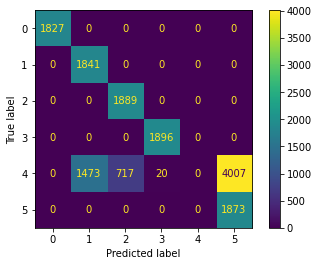

In [307]:
#confusion matrix with uncat_data appended
plot_confusion_matrix(rn, final_test, new_ytest)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


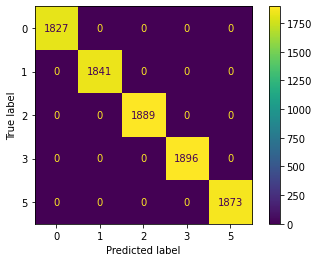

In [308]:
#confusion matrix without uncat_data appended
plot_confusion_matrix(rn, x_test, y_test)

In [309]:
end_time = time.time()

In [310]:
Measured_time = end_time - start_time

In [311]:
print('Execution Time:', Measured_time, 'seconds')

Execution Time: 2.9600577354431152 seconds


## **CatBoost** **Classifier**

In [312]:
!pip install catboost
!pip install scikit-learn
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [313]:
from catboost import CatBoostClassifier

In [314]:
cb = CatBoostClassifier() 

In [315]:
start1 = time.time()

In [316]:
cb.fit(x_train, y_train)

Learning rate set to 0.092585
0:	learn: 1.2594130	total: 15.6ms	remaining: 15.6s
1:	learn: 1.0382203	total: 31.8ms	remaining: 15.9s
2:	learn: 0.8782769	total: 46.1ms	remaining: 15.3s
3:	learn: 0.7547117	total: 61.1ms	remaining: 15.2s
4:	learn: 0.6555435	total: 74.9ms	remaining: 14.9s
5:	learn: 0.5739534	total: 90ms	remaining: 14.9s
6:	learn: 0.5056460	total: 104ms	remaining: 14.7s
7:	learn: 0.4476862	total: 123ms	remaining: 15.2s
8:	learn: 0.3979265	total: 136ms	remaining: 14.9s
9:	learn: 0.3548608	total: 149ms	remaining: 14.7s
10:	learn: 0.3173827	total: 163ms	remaining: 14.6s
11:	learn: 0.2845262	total: 183ms	remaining: 15.1s
12:	learn: 0.2555329	total: 204ms	remaining: 15.5s
13:	learn: 0.2299357	total: 219ms	remaining: 15.4s
14:	learn: 0.2072002	total: 232ms	remaining: 15.2s
15:	learn: 0.1869319	total: 245ms	remaining: 15.1s
16:	learn: 0.1688945	total: 259ms	remaining: 15s
17:	learn: 0.1526932	total: 283ms	remaining: 15.4s
18:	learn: 0.1381964	total: 296ms	remaining: 15.3s
19:	learn

In [317]:
cb.score(x_test, y_test)

1.0

In [318]:
pred_cb = cb.predict(x_test)

In [319]:
pred_cb1 = cb.predict(final_test)

In [320]:
#classificattion metrics withouth the uncat_data appended
print( classification_report(y_test, pred_cb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1827
           1       1.00      1.00      1.00      1841
           2       1.00      1.00      1.00      1889
           3       1.00      1.00      1.00      1896
           5       1.00      1.00      1.00      1873

    accuracy                           1.00      9326
   macro avg       1.00      1.00      1.00      9326
weighted avg       1.00      1.00      1.00      9326



In [321]:
#classificattion metrics with the uncat_data appended
print( classification_report(new_ytest, pred_cb1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1827
           1       1.00      1.00      1.00      1841
           2       0.99      1.00      1.00      1889
           3       0.53      1.00      0.69      1896
           4       0.00      0.00      0.00      6217
           5       0.29      1.00      0.45      1873

    accuracy                           0.60     15543
   macro avg       0.64      0.83      0.69     15543
weighted avg       0.46      0.60      0.50     15543



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


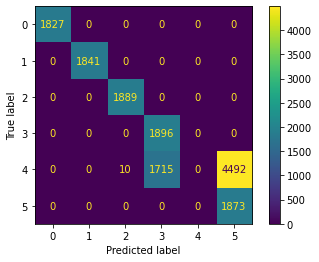

In [322]:
#confusion matrix with uncat_data appended
plot_confusion_matrix(cb, final_test, new_ytest)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


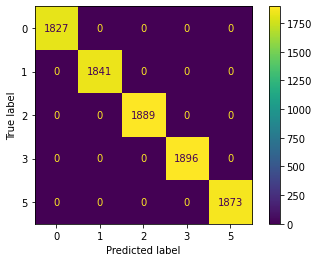

In [323]:
#confusion matrix without uncat_data appended
plot_confusion_matrix(cb, x_test, y_test)

In [324]:
end1 = time.time()

In [325]:
Measured_time1 = end1 - start1

In [326]:
print('Execution Time:',Measured_time1,  "seconds")

Execution Time: 37.95425224304199 seconds


## GRADIENT BOOST CLASSIFIER

In [327]:
from sklearn.ensemble import GradientBoostingClassifier

In [328]:
gb = GradientBoostingClassifier()

In [329]:
start2 = time.time()

In [330]:
gb.fit(x_train, y_train)

GradientBoostingClassifier()

In [331]:
gb.score(x_test, y_test)

1.0

In [332]:
pred_gb = gb.predict(x_test)

In [333]:
pred_gb1 = gb.predict(final_test)

In [334]:
#classificattion metrics withouth the uncat_data appended
print(classification_report(y_test, pred_gb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1827
           1       1.00      1.00      1.00      1841
           2       1.00      1.00      1.00      1889
           3       1.00      1.00      1.00      1896
           5       1.00      1.00      1.00      1873

    accuracy                           1.00      9326
   macro avg       1.00      1.00      1.00      9326
weighted avg       1.00      1.00      1.00      9326



In [335]:
#classificattion metrics with the uncat_data appended
print(classification_report(new_ytest, pred_gb1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1827
           1       0.67      1.00      0.80      1841
           2       0.26      1.00      0.42      1889
           3       0.99      1.00      1.00      1896
           4       0.00      0.00      0.00      6217
           5       1.00      1.00      1.00      1873

    accuracy                           0.60     15543
   macro avg       0.65      0.83      0.70     15543
weighted avg       0.47      0.60      0.51     15543



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


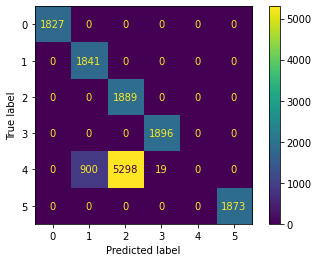

In [336]:
#confusion matrix with uncat_data appended
plot_confusion_matrix(gb, final_test, new_ytest)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


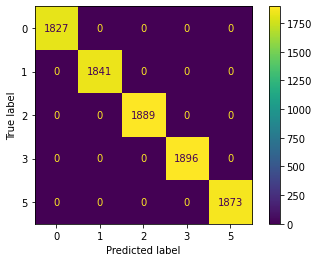

In [337]:
#confusion matrix without uncat_data appended
plot_confusion_matrix(cb, x_test, y_test)

In [338]:
end2 = time.time()

In [339]:
measured_time2 = end2 - start2 

In [340]:
print('Execution Time:',measured_time2, "seconds")

Execution Time: 13.205362319946289 seconds


## LIGHT GRADIENT BOOST CLASSIFIER 

In [341]:
from lightgbm import LGBMClassifier

In [342]:
lgb = LGBMClassifier()

In [343]:
start3 = time.time()

In [344]:
lgb.fit(x_train, y_train)

LGBMClassifier()

In [345]:
lgb.score(x_test, y_test)

1.0

In [346]:
pred_lgb = lgb.predict(x_test)

In [347]:
pred_lgb1 = lgb.predict(final_test)

In [348]:
#classication report wothout un_cat data
print(classification_report(y_test, pred_lgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1827
           1       1.00      1.00      1.00      1841
           2       1.00      1.00      1.00      1889
           3       1.00      1.00      1.00      1896
           5       1.00      1.00      1.00      1873

    accuracy                           1.00      9326
   macro avg       1.00      1.00      1.00      9326
weighted avg       1.00      1.00      1.00      9326



In [349]:
#classification report with un_cat data
print(classification_report(new_ytest, pred_lgb1))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1827
           1       0.67      1.00      0.80      1841
           2       0.26      1.00      0.42      1889
           3       0.99      1.00      1.00      1896
           4       0.00      0.00      0.00      6217
           5       1.00      1.00      1.00      1873

    accuracy                           0.60     15543
   macro avg       0.65      0.83      0.70     15543
weighted avg       0.47      0.60      0.51     15543



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


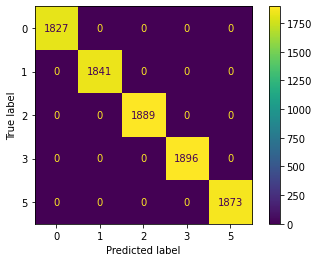

In [350]:
#confusion matrix without un_cat data
plot_confusion_matrix(lgb, x_test, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


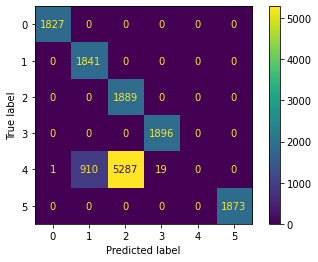

In [351]:
#confusion matrix with un_cat data
plot_confusion_matrix(lgb, final_test, new_ytest)

In [352]:
end3 = time.time()

In [353]:
measured_time3 = end3 - start3 

In [354]:
print('execution Time: ', measured_time3, 'seconds')

execution Time:  7.5034706592559814 seconds


### COMPARISON OF EXECTION TIME 

In [355]:
time = [Measured_time, Measured_time1, measured_time2, measured_time3]

In [356]:
compare = pd.DataFrame({'Algorithm': ['Random Forest', 'Cat Boost', 'Gradient Boost', 'Light Gradient Boost'], "Execution_Time": time})

In [357]:
compare 

,Algorithm,Execution_Time
0,Random Forest,2.960058
1,Cat Boost,37.954252
2,Gradient Boost,13.205362
3,Light Gradient Boost,7.503471


In [358]:
color = ['green', 'yellow', 'indigo', 'red']

<BarContainer object of 4 artists>

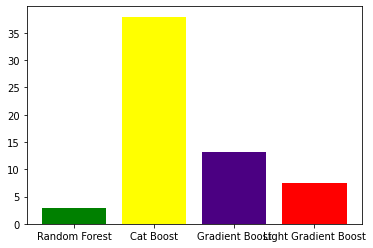

In [359]:
plt.bar(compare['Algorithm'], compare['Execution_Time'], color=color)